Name: Deep Pooja, Roll No.-17074  Part-1A, Assignment-2

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#importing liberies different error function 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import train_test_split
%matplotlib inline
data = pd.read_csv(r"C:\Users\hp\Downloads\HAPT Data Set\Gaussian_noise.csv",names=["X", "t"])
print(data.shape)
d = data.iloc[0:20,:] # taking first 20 sample data points
# extracting features and target set of data "d"
X = d.iloc[:,0:1]
Y = d.iloc[:,1]
# extracting features and target set of data "data"
x = data.iloc[:,0:1]
y = data.iloc[:,1]
print(d.head())
data.describe()

(100, 2)
         X       t
0 -0.24890  8.0050
1 -0.15351  7.9964
2  0.75275  8.0395
3 -0.34430  8.0695
4  1.25360  8.0277


,X,t
count,100.000000,100.000000
mean,0.240000,8.092878
std,0.691889,0.152974
min,-0.940520,7.986200
25%,-0.350260,8.001000
50%,0.240000,8.019300
75%,0.830260,8.084075
max,1.420500,8.528000


In [50]:
df = pd.read_csv(r"C:\Users\hp\Downloads\HAPT Data Set\NonGaussian_noise.csv",names=["X", "t"])
print(df.shape)
#df1 = df.iloc[0:20,:] # taking first 20 sample data points
# extracting features and target set of data "d"
#U = d.iloc[:,0:1]
#V = d.iloc[:,1]
# extracting features and target set of data "data"
u = df.iloc[:,0:1]
v = df.iloc[:,1]
print(df.head())
df.describe()

(100, 2)
         X       t
0  1.90630   7.846
1 -1.46260  28.116
2 -1.27800  35.332
3  0.10648  11.141
4  1.49090  12.746


,X,t
count,100.000000,100.000000
mean,0.683331,10.802743
std,1.338829,12.129903
min,-1.601000,-19.366000
25%,-0.458835,10.675750
50%,0.683335,12.036000
75%,1.825525,13.776250
max,2.967700,35.332000


In [85]:
error_func = [mean_squared_error,max_error,mean_absolute_error,mean_squared_log_error,median_absolute_error]
 
from sklearn.pipeline import Pipeline
def find_best_deg(a,b):
    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.25)
    rmses = []
    degrees = np.arange(1, 25)
    min_rmse, min_deg = 1e10, 0
    rmses.clear()
    for deg in degrees:
       
        polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=deg,
        include_bias=False)),
        ("lin_reg", LinearRegression()),
        ])

        # Compare with test data
        polynomial_regression.fit(x_train,y_train)
        poly_predict = polynomial_regression.predict(x_test)
        poly_mse =mean_squared_error(y_test, poly_predict)
        #poly_rmse = np.sqrt(poly_mse)
        rmses.append(poly_mse)

        # Cross-validation of degree
        if min_rmse > poly_mse:
            min_rmse = poly_mse
            min_deg = deg

    # Plot and present results
    print('Best degree {} mean_squared_log_error {}'.format(min_deg, min_rmse))
    
    plt.plot(degrees,rmses)
    plt.xlabel('Degree of polyomial')
    plt.ylabel('mean_squared_error')
    plt.title('part 1B')
    plt.show()

Best degree 13 mean_squared_log_error 1.010844380662619


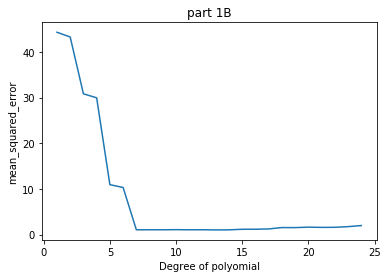

In [86]:
#findig the best fitting degree with MSE error
find_best_deg(u,v)

In [ ]:
# noise variance estimation
def noise_variance(y,y_pred):
    er = 0
    for i in range(1,len(y)):
        e =(y_pred[i]-y[i])*(y_pred[i]-y[i])
        er += e
    return er/len(y)
noise = noise_variance(Y,y_predicted)
print(noise)